## Loading IEEE Fraud Data

In [1]:
from google.colab import files
files.upload()                         # Upload Kaggle.json


!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-fraud-detection

Saving kaggle.json to kaggle.json
 63% 33.0M/52.5M [00:00<00:00, 29.0MB/s]
100% 52.5M/52.5M [00:00<00:00, 67.5MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 100MB/s]
 97% 46.0M/47.3M [00:00<00:00, 43.4MB/s]
100% 47.3M/47.3M [00:00<00:00, 64.3MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 199MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 158MB/s]


We need to unzip the following files
- test_identity
- test_transaction
- train_identity
- train_transaction

In [2]:
!unzip test_identity.csv.zip
!unzip test_transaction.csv.zip
!unzip train_identity.csv.zip
!unzip train_transaction.csv.zip

Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   


## Lets read the files now

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns


In [0]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')


In [5]:
print(train_identity.shape, train_transaction.shape)
print(test_identity.shape, test_transaction.shape)

(144233, 41) (590540, 394)
(141907, 41) (506691, 393)


Missing values removal

In [6]:
print(0.9 * train_identity.shape[0])
print(0.9 * train_transaction.shape[0])
print(0.9 * test_identity.shape[0])
print(0.9 * test_transaction.shape[0])

129809.7
531486.0
127716.3
456021.9


In [0]:
train_identity.dropna(axis=1, inplace=True, thresh = 130000)
train_transaction.dropna(axis=1, inplace=True, thresh = 530000)

In [8]:
train_identity.shape

(144233, 19)

In [9]:
train_transaction.shape

(590540, 112)

We have extracted all the columns which have over 90% missing data

In [10]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 19 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_15            140985 non-null object
id_17            139369 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_28            140978 non-null object
id_29            140978 non-null object
id_31            140282 non-null object
id_35            140985 non-null object
id_36            140985 non-null object
id_37            140985 non-null object
id_38            140985 non-null object
DeviceType       140810 non-null object
dtypes: float64(8), int64(1), object(10)
memory usage: 20.9+ MB


In [11]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 504.6+ MB


In [0]:
# Both train_identity and train_transactions have a common column TransactionID. Lets merge both of them

train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [71]:
# Lets look at a row

train.iloc[0]

TransactionID      2987000
isFraud                  0
TransactionDT        86400
TransactionAmt        68.5
ProductCD                W
card1                13926
card2                  NaN
card3                  150
card4             discover
card5                  142
card6               credit
C1                       1
C2                       1
C3                       0
C4                       0
C5                       0
C6                       1
C7                       0
C8                       0
C9                       1
C10                      0
C11                      2
C12                      0
C13                      1
C14                      1
D1                      14
V95                      0
V96                      1
V97                      0
V98                      0
                    ...   
V310                     0
V311                     0
V312                     0
V313                     0
V314                     0
V315                     0
V

In [72]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

The data is highly imbalanced with less than 5% of minority class.

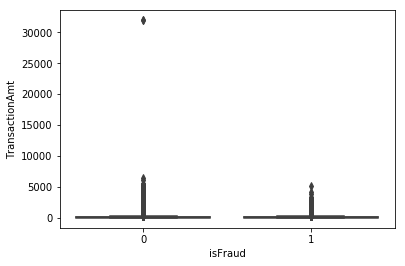

In [15]:
sns.boxplot(x='isFraud', y='TransactionAmt', data=train)

In [0]:
x = train[train['isFraud'] == 0]['TransactionAmt']

y = train[train['isFraud'] == 1]['TransactionAmt']

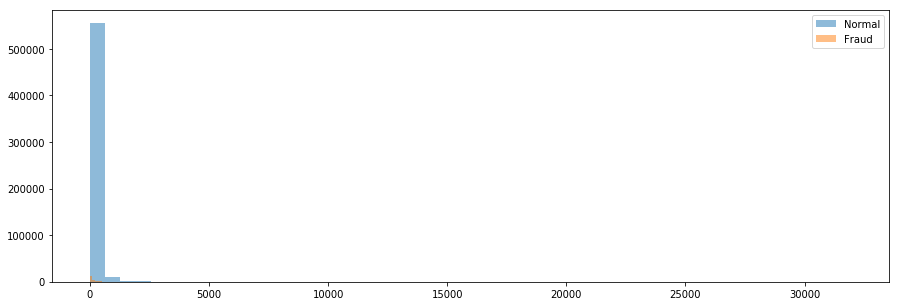

In [17]:
plt.figure(figsize=(15,5))
plt.hist(x, 50, alpha=0.5, label='Normal')
plt.hist(y, 50, alpha=0.5, label='Fraud')
plt.legend(loc='upper right')
plt.show()

You can see very few frequency of fraud transactions. The amount is similar to normal transactions.

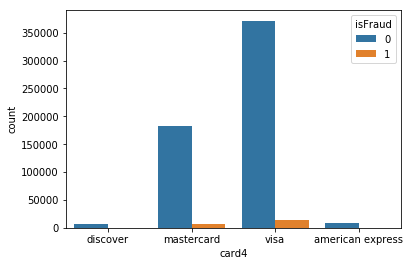

In [18]:
sns.countplot(train['card4'], hue=train['isFraud'])

Visa and Mastercard are seeing a lot of fraud transactions as compared to americal express and discover.

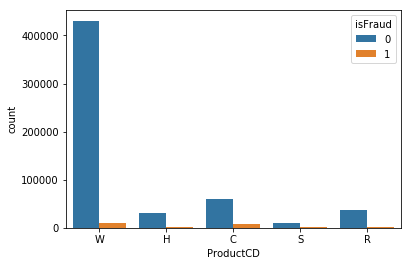

In [19]:
sns.countplot(train['ProductCD'], hue=train['isFraud'])

Product C and W have a lot of fraud transactions.

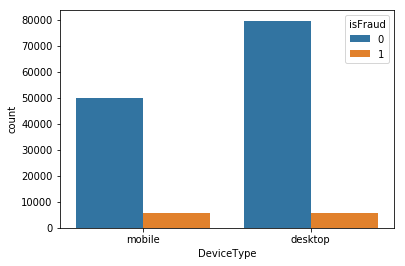

In [20]:
sns.countplot(train['DeviceType'], hue=train['isFraud'])

Lets look at the missing values in the entire train data

In [73]:
train.shape

(590540, 130)

In [74]:
clean_train = train.dropna()
clean_train.shape

(134659, 130)

In [0]:
cat_df = clean_train.select_dtypes(include='object')

In [76]:
cat_df.head()

,ProductCD,card4,card6,id_12,id_15,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
8,H,visa,debit,NotFound,New,New,NotFound,mobile safari 11.0,T,F,F,T,mobile
10,C,mastercard,credit,NotFound,Found,Found,Found,chrome 62.0,F,F,T,T,desktop
11,C,mastercard,debit,NotFound,New,New,NotFound,chrome 62.0,F,F,T,T,desktop
16,H,visa,debit,NotFound,Found,Found,Found,chrome 62.0,T,F,T,T,desktop
17,H,mastercard,credit,NotFound,Found,Found,Found,chrome 62.0,T,F,T,T,desktop


id_12, id_15, id_28, id_29, id_31, id_35, id_36, id_37, id_38, DeviceType are categorical columns.

In [77]:
cat_df.columns.values.tolist()

['ProductCD',
 'card4',
 'card6',
 'id_12',
 'id_15',
 'id_28',
 'id_29',
 'id_31',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType']

In [78]:
cat_df.nunique()

ProductCD       4
card4           4
card6           3
id_12           2
id_15           3
id_28           2
id_29           2
id_31         130
id_35           2
id_36           2
id_37           2
id_38           2
DeviceType      2
dtype: int64

In [79]:
cat_df.drop('id_31', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
cat_df_dummy = pd.get_dummies(cat_df, drop_first=True)
cat_df_dummy.head()

,ProductCD_H,ProductCD_R,ProductCD_S,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,id_12_NotFound,id_15_New,id_15_Unknown,id_28_New,id_29_NotFound,id_35_T,id_36_T,id_37_T,id_38_T,DeviceType_mobile
8,1,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1
10,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0
11,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0
16,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0
17,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0


In [81]:
cat_df_dummy.shape

(134659, 18)

In [82]:
clean_train.drop(columns=cat_df.columns.values.tolist(), axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [83]:
clean_train.drop('id_31', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [84]:
clean_train = pd.concat([clean_train, cat_df_dummy], axis=1)
clean_train.shape

(134659, 135)

## Train Test Split

In [85]:
X = clean_train.drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
X.shape

(134659, 132)

In [0]:
y = clean_train['isFraud']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Modelling

## XGBoost

In [0]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [91]:
# XGBoost Model


model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=20,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(X_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

In [0]:
xgb_pred = model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy : ", accuracy_score(y_test, xgb_pred))
print("Confusion matrix : \n", confusion_matrix(y_test, xgb_pred))
print("Classification report:  \n", classification_report(y_test, xgb_pred))


Accuracy :  0.9673251151047082
Confusion matrix : 
 [[30779   211]
 [  889  1786]]
Classification report:  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     30990
           1       0.89      0.67      0.76      2675

    accuracy                           0.97     33665
   macro avg       0.93      0.83      0.87     33665
weighted avg       0.97      0.97      0.97     33665



## LightGBM

In [0]:
import lightgbm as lgb

In [0]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [98]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
[1000]	valid_0's binary_logloss: 0.105599
[2000]	valid_0's binary_logloss: 0.0964665
[3000]	valid_0's binary_logloss: 0.0911893
[4000]	valid_0's binary_logloss: 0.0883318
[5000]	valid_0's binary_logloss: 0.0861604
[6000]	valid_0's binary_logloss: 0.0848646
Early stopping, best iteration is:
[6182]	valid_0's binary_logloss: 0.0847355


In [0]:
y_pred = model.predict(X_test)

In [106]:
y_pred

array([4.43815000e-03, 5.53073617e-04, 9.16226109e-03, ...,
       4.67144707e-03, 9.43236234e-04, 2.76004169e-05])

In [0]:
lgb_pred = np.round(y_pred)

In [117]:
np.unique(lgb_pred, return_counts=True)

(array([0., 1.]), array([31549,  2116]))

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy : ", accuracy_score(y_test, lgb_pred))
print("Confusion matrix : \n", confusion_matrix(y_test, lgb_pred))
print("Classification report:  \n", classification_report(y_test, lgb_pred))


Accuracy :  0.9720481211941185
Confusion matrix : 
 [[30799   191]
 [  750  1925]]
Classification report:  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     30990
           1       0.91      0.72      0.80      2675

    accuracy                           0.97     33665
   macro avg       0.94      0.86      0.89     33665
weighted avg       0.97      0.97      0.97     33665

